# Are YOU a Crossfit Games Athlete? This new data will let you know if YOU ARE (a) FIT.

https://medium.com/p/e83c04eb783e/edit

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_path = "/Users/pblsnt/Documents/DataScientist_Nanodegree_Udacity/Data"
crossfit_data = "/crossfit_games_data"

In [3]:
def read_file_csv(filepath, header=0, sep=','):
    return pd.read_csv(filepath_or_buffer=filepath, sep=sep, header=header)

In [4]:
crossfit_open_scores_2019_file = data_path + crossfit_data + "/2019_opens_scores.csv"
crossfit_open_athletes_2019_file = data_path + crossfit_data + "/2019_opens_athletes.csv"
crossfit_open_scores_2020_file = data_path + crossfit_data + "/2020_opens_scores.csv"
crossfit_open_athletes_2020_file = data_path + crossfit_data + "/2020_opens_athletes.csv"

## What does a Crossfit Athlete look like?

In [5]:
crossfit_open_athletes_2019 = read_file_csv(crossfit_open_athletes_2019_file)
crossfit_open_athletes_2019.head()

/opt/anaconda3/envs/DSNanodegree/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3254: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


,competitorid,competitorname,firstname,lastname,postcompstatus,gender,profilepics3key,countryoforigincode,countryoforiginname,divisionid,affiliateid,affiliatename,age,height,weight,overallrank,overallscore,is_scaled,division
0,2536,Samantha Briggs,Samantha,Briggs,accepted,F,0e63d-P2536_14-184.jpg,GB,United Kingdom,19,4098,CrossFit Black Five,37,1.70,61.23,1,33,0,Women (35-39)
1,485089,Renata Pimentel,Renata,Pimentel,accepted,F,04e97-P485089_5-184.jpg,BR,Brazil,19,15868,CrossFit Gurkha,36,1.74,73.00,2,66,0,Women (35-39)
2,16973,Carleen Mathews,Carleen,Mathews,NaN,F,b663a-P16973_6-184.jpg,US,United States,19,10471,CrossFit Saint Helens,35,1.57,62.14,3,101,0,Women (35-39)
3,751083,Danila Capaccetti,Danila,Capaccetti,NaN,F,pukie.png,IT,Italy,19,9329,CrossFit Black Shark,35,1.70,71.00,4,139,0,Women (35-39)
4,313257,Hope Cicero,Hope,Cicero,NaN,F,f204b-P313257_1-184.jpg,US,United States,19,438,CrossFit Billings,36,1.55,61.23,5,176,0,Women (35-39)


#### Select Meaningful Columns

In [6]:
columns_to_drop = ['competitorname'
                   , 'firstname'
                   , 'lastname'
                   , 'postcompstatus'
                   , 'profilepics3key'
                   , 'countryoforigincode'
                   , 'affiliatename'
                   , 'divisionid'
]

In [7]:
crossfit_open_athletes_2019_filtered = crossfit_open_athletes_2019.drop(columns_to_drop, axis=1)

### Athletes Characteristics

In [8]:
crossfit_open_athletes_2019_filtered.head()

,competitorid,gender,countryoforiginname,affiliateid,age,height,weight,overallrank,overallscore,is_scaled,division
0,2536,F,United Kingdom,4098,37,1.70,61.23,1,33,0,Women (35-39)
1,485089,F,Brazil,15868,36,1.74,73.00,2,66,0,Women (35-39)
2,16973,F,United States,10471,35,1.57,62.14,3,101,0,Women (35-39)
3,751083,F,Italy,9329,35,1.70,71.00,4,139,0,Women (35-39)
4,313257,F,United States,438,36,1.55,61.23,5,176,0,Women (35-39)


In [24]:
total_number_of_athletes_2019 = crossfit_open_athletes_2019_filtered.competitorid.count()

In [9]:
crossfit_open_athletes_2019_filtered.isna().mean()

competitorid           0.000000
gender                 0.000000
countryoforiginname    0.000000
affiliateid            0.000000
age                    0.000000
height                 0.467700
weight                 0.434642
overallrank            0.000000
overallscore           0.000000
is_scaled              0.000000
division               0.000000
dtype: float64

In [10]:
crossfit_open_athletes_2019_filtered[crossfit_open_athletes_2019_filtered.height.isna()].weight.isna().mean()

0.8797408804092148

In [11]:
crossfit_open_athletes_2019_filtered.height.describe()

count    304823.000000
mean          1.743674
std           1.439308
min           0.010000
25%           1.670000
50%           1.750000
75%           1.800000
max         266.240000
Name: height, dtype: float64

In [12]:
height_lower_cap = crossfit_open_athletes_2019_filtered.height.quantile(0.02) # 1.5 m
height_upper_cap = crossfit_open_athletes_2019_filtered.height.quantile(0.99) # 1.96 m

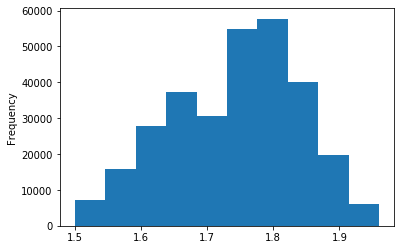

In [13]:
crossfit_open_athletes_2019_filtered.height.plot.hist(bins = 10,range=(height_lower_cap, height_upper_cap));

In [14]:
crossfit_open_athletes_2019_filtered \
    .loc[~crossfit_open_athletes_2019_filtered.height.between(height_lower_cap,height_upper_cap),"height"]= np.NaN

In [15]:
crossfit_open_athletes_2019_filtered.weight.describe()

count    323754.000000
mean         78.343412
std          44.720039
min       -9054.150000
25%          67.000000
50%          78.930000
75%          88.450000
max       16960.000000
Name: weight, dtype: float64

In [16]:
weight_lower_cap = crossfit_open_athletes_2019_filtered.weight.quantile(0.01) # 51 kg
weight_upper_cap = crossfit_open_athletes_2019_filtered.weight.quantile(0.99) # 120.2 kg

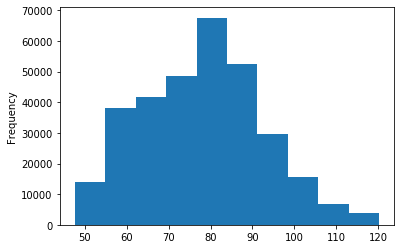

In [17]:
crossfit_open_athletes_2019_filtered.weight.plot.hist(bins = 10,range=(weight_lower_cap, weight_upper_cap));

In [18]:
crossfit_open_athletes_2019_filtered \
    .loc[~crossfit_open_athletes_2019_filtered.weight.between(weight_lower_cap,weight_upper_cap),"weight"]= np.NaN

In [20]:
crossfit_open_athletes_2019_filtered.height.describe()

count    297412.000000
mean          1.738713
std           0.096774
min           1.500000
25%           1.680000
50%           1.750000
75%           1.800000
max           1.960000
Name: height, dtype: float64

In [21]:
crossfit_open_athletes_2019_filtered.weight.describe()

count    318034.000000
mean         78.156592
std          14.386518
min          47.630000
25%          67.000000
50%          78.930000
75%          88.000000
max         120.200000
Name: weight, dtype: float64

In [22]:
crossfit_open_athletes_2019_filtered.isna().mean()

competitorid           0.000000
gender                 0.000000
countryoforiginname    0.000000
affiliateid            0.000000
age                    0.000000
height                 0.480642
weight                 0.444631
overallrank            0.000000
overallscore           0.000000
is_scaled              0.000000
division               0.000000
dtype: float64

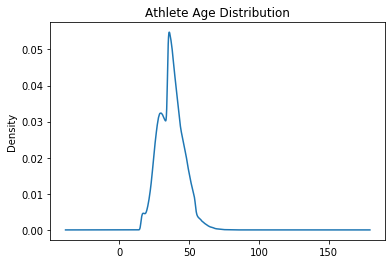

In [88]:
crossfit_open_athletes_2019_filtered.age.plot.kde(title='Athlete Age Distribution');

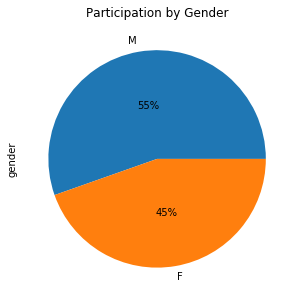

In [71]:
crossfit_open_athletes_2019_filtered.gender.value_counts().plot(kind='pie'
                                                                , figsize=(5,5)
                                                                , autopct='%1.0f%%'
                                                                , pctdistance=0.5
                                                                , title='Participation by Gender');

In [51]:
crossfit_open_athletes_2019_filtered.countryoforiginname.describe()

count            572653
unique               11
top       United States
freq             302505
Name: countryoforiginname, dtype: object

In [52]:
top_countries_df = crossfit_open_athletes_2019_filtered.countryoforiginname.value_counts().sort_values(ascending=False).head(10)

In [53]:
top_countries_df

United States     302505
Other              94780
Canada             31437
Brazil             30226
United Kingdom     29020
Australia          28781
France             23364
Germany             9205
Spain               8157
Italy               7700
Name: countryoforiginname, dtype: int64

In [54]:
crossfit_open_athletes_2019_filtered \
    .loc[~crossfit_open_athletes_2019_filtered.countryoforiginname.isin(top_countries_df.index.tolist()),"countryoforiginname"]= 'Other'

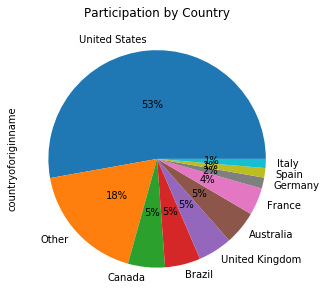

In [58]:
crossfit_open_athletes_2019_filtered.countryoforiginname.value_counts().plot(kind="pie"
                                 , figsize=(5,5)
                                 , autopct='%1.0f%%'
                                 , pctdistance=0.5
                                 , title='Participation by Country');

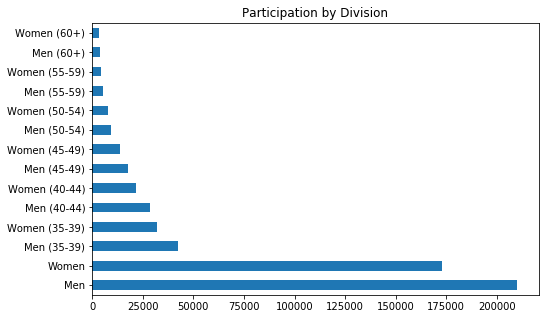

In [74]:
crossfit_open_athletes_2019_filtered.division.value_counts().plot.barh(title="Participation by Division"
                                                                       , figsize = (8,5));

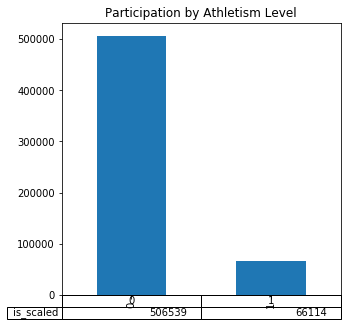

In [79]:
crossfit_open_athletes_2019_filtered.is_scaled.value_counts().plot.bar(title="Participation by Athletism Level"
                                                                       , figsize = (5,5)
                                                                      , table=True);

In [7]:
crossfit_open_scores_2019 = read_file_csv(crossfit_open_scores_2019_file)
crossfit_open_scores_2019.head()

,affiliate,breakdown,competitorid,division,is_scaled,judge,ordinal,rank,scaled,score,scoredisplay,scoreidentifier,time
0,CrossFit RDU,9 rounds +\n10 wall-ball shots\n,96511,Men (45-49),0,Erin Miller,1,1,0,13520000,352 reps,27f30f9a8c0a564ae799,NaN
1,CrossFit RDU,Within 16 minutes:\n3 rounds +\n25 toes-to-bar...,96511,Men (45-49),0,Harper Thorsen,2,4,0,13420368,342 reps,0ed3d1264f25a8f1890d,NaN
2,CrossFit RDU,200-ft. OH lunge\n50 box step-ups\n50 strict H...,96511,Men (45-49),0,Harper Thorsen,3,1,0,11800018,9:42,f2a143399a330c95321b,582.0
3,CrossFit RDU,132 reps\n6 rounds,96511,Men (45-49),0,Harper Thorsen,4,36,0,11320009,11:51,89101e401c6c85997363,711.0
4,CrossFit RDU,210 reps,96511,Men (45-49),0,Harper Thorsen,5,1,0,12100573,10:27,f7588c9174f1fe90f5c4,627.0


In [13]:
def join_df(left_df, right_df, on, how='inner', left_suffix='_left', right_suffix='_right'):
    return left_df.join(other=right_df, on=on, how=how, lsuffix=left_suffix, rsuffix=right_suffix)